# Steam Sale Sensei

Predicting when a game will first go on sale. Dataset starts from a kaggle dataset to first get a list of games, and then pricing history data comes from https://docs.isthereanydeal.com

## Data Collection

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests
from dotenv import load_dotenv
from datetime import datetime

In [2]:
games_df = pd.read_csv('../data/games.csv')
games_df.head(3)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Just looking at some specific games to cpoy and paste exact string to test the API.

In [3]:
for game in games_df['Name']:
    if type(game) ==str and 'Batman' in game:
        print(game)

Batman™: Arkham Origins Blackgate - Deluxe Edition
Batman: Arkham City
LEGO® Batman™ 3: Beyond Gotham
Batman: The Enemy Within - The Telltale Series
Batman™: Arkham Origins
Batman™: Arkham VR
Batman™: Arkham Knight
Batman: Arkham Asylum Game of the Year Edition
Batman: Arkham Asylum Game of the Year Edition
Batman: Arkham City - Game of the Year Edition
Batman - The Telltale Series
LEGO® Batman™: The Videogame
LEGO® Batman™ 2: DC Super Heroes


In [4]:
games_df[games_df['Name'] == 'Batman™: Arkham Knight']

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
35324,208650,Batman™: Arkham Knight,"Jun 23, 2015",2000000 - 5000000,1996,17,19.99,24,Batman™: Arkham Knight brings the award-winnin...,"['English', 'French', 'Italian', 'German', 'Sp...",...,289,870,455,Rocksteady Studios,Warner Bros. Interactive Entertainment,"Single-player,Steam Achievements,Full controll...","Action,Adventure","Action,Open World,Superhero,Stealth,Adventure,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


### Exploring IsThereAnyDeal API

The API won't give us everything we need with one simple request, so we can follow these steps:
1. Use the title or AppID of a game to look it up and get the game_id
2. Using the game_id we can get the game info, which has the release date
3. Finally we also just need the pricing history to see when it first went on sale.

Target variable will (likely) be the number of months it took before the game went on sale for the first time.

In [16]:
load_dotenv('../.env')
api_key = os.getenv('API_KEY')

In [24]:
# helper function to make requests and prevent repetitive code
def request_game_data(endpoint, params):
    response = requests.get(endpoint, params=params)

    if response.status_code == 200:
        data = response.json()
        return data
    else:
        return f'Error: {response.status_code}'

Getting game id

In [8]:
endpoint = 'https://api.isthereanydeal.com/games/lookup/v1'

params = {
    'key': api_key,
    'appid': 208650
    #'title': 'Batman™: Arkham Knight'
}

game_lookup = request_game_data(endpoint, params)
print(game_lookup)


{'found': True, 'game': {'id': '018d937f-0e0c-70be-91d5-75e399e6b4e3', 'slug': 'batman-arkham-knight', 'title': 'Batman: Arkham Knight', 'type': 'game', 'mature': False}}


Getting game info for release date

In [9]:
endpoint = "https://api.isthereanydeal.com/games/info/v2"

params = {
    'key': api_key,
    'id': '018d937f-0e0c-70be-91d5-75e399e6b4e3'
}

game_info = request_game_data(endpoint, params)
print(game_info)
print(game_info['releaseDate'])

{'id': '018d937f-0e0c-70be-91d5-75e399e6b4e3', 'slug': 'batman-arkham-knight', 'title': 'Batman: Arkham Knight', 'type': 'game', 'mature': False, 'assets': {'boxart': 'https://dbxce1spal1df.cloudfront.net/018d937f-0e0c-70be-91d5-75e399e6b4e3/boxart.jpg', 'banner145': 'https://dbxce1spal1df.cloudfront.net/018d937f-0e0c-70be-91d5-75e399e6b4e3/banner145.jpg', 'banner300': 'https://dbxce1spal1df.cloudfront.net/018d937f-0e0c-70be-91d5-75e399e6b4e3/banner300.jpg', 'banner400': 'https://dbxce1spal1df.cloudfront.net/018d937f-0e0c-70be-91d5-75e399e6b4e3/banner400.jpg', 'banner600': 'https://dbxce1spal1df.cloudfront.net/018d937f-0e0c-70be-91d5-75e399e6b4e3/banner600.jpg'}, 'earlyAccess': False, 'achievements': True, 'tradingCards': True, 'appid': 208650, 'tags': ['Action', 'Open World', 'Superhero', 'Stealth', 'Third Person'], 'releaseDate': '2015-06-23', 'developers': [{'id': 423, 'name': 'Rocksteady Studios'}, {'id': 6704, 'name': 'Rocksteady'}], 'publishers': [{'id': 21, 'name': 'Warner Bros.

Getting game price history

In [10]:
endpoint_prices = 'https://api.isthereanydeal.com/games/history/v2'

since_datetime = datetime.strptime('2015-06-23 00:0:00', '%Y-%m-%d %H:%M:%S') # random release date
# since_datetime = datetime.strptime(f"{game_info['releaseDate']} 00:0:00", "%Y-%m-%d %H:%M:%S") # using release date from previous cell
since_datetime_str = since_datetime.isoformat() + '-05:00'


params = {
    'key': api_key,
    'country': 'US',
    'id': "018d937f-0e0c-70be-91d5-75e399e6b4e3",
    'shops': [61],
    'since': since_datetime_str
}

print(request_game_data(endpoint_prices, params))

[{'timestamp': '2024-04-18T19:15:49+02:00', 'shop': {'id': 61, 'name': 'Steam'}, 'deal': {'price': {'amount': 19.99, 'amountInt': 1999, 'currency': 'USD'}, 'regular': {'amount': 19.99, 'amountInt': 1999, 'currency': 'USD'}, 'cut': 0}}, {'timestamp': '2024-04-11T19:18:03+02:00', 'shop': {'id': 61, 'name': 'Steam'}, 'deal': {'price': {'amount': 3.99, 'amountInt': 399, 'currency': 'USD'}, 'regular': {'amount': 19.99, 'amountInt': 1999, 'currency': 'USD'}, 'cut': 80}}, {'timestamp': '2024-03-21T18:18:55+01:00', 'shop': {'id': 61, 'name': 'Steam'}, 'deal': {'price': {'amount': 19.99, 'amountInt': 1999, 'currency': 'USD'}, 'regular': {'amount': 19.99, 'amountInt': 1999, 'currency': 'USD'}, 'cut': 0}}, {'timestamp': '2024-03-14T18:27:41+01:00', 'shop': {'id': 61, 'name': 'Steam'}, 'deal': {'price': {'amount': 3.99, 'amountInt': 399, 'currency': 'USD'}, 'regular': {'amount': 19.99, 'amountInt': 1999, 'currency': 'USD'}, 'cut': 80}}, {'timestamp': '2024-02-26T19:21:47+01:00', 'shop': {'id': 61,

### Getting Pricing History Data

The games_df data from Kaggle has too much data to make requests for iteratively. Thus, let's look at value counts to consider how to select a subset.

In [10]:
# convert release date into proper format
def parse_date(date_string):
    # Define the possible date formats
    date_formats = ["%b %d, %Y", "%b %Y", "%Y"]
    
    for date_format in date_formats:
        try:
            return datetime.strptime(date_string, date_format).strftime("%Y-%m-%d")
        except ValueError:
            continue
    # If no format matches, return None or any default value
    return None

# Apply the function to the 'Release date' column
games_df['ReleaseDate'] = games_df['Release date'].apply(parse_date)

In [11]:
games_df['ParsedReleaseDate'] = pd.to_datetime(games_df['ReleaseDate'], format="%Y-%m-%d")

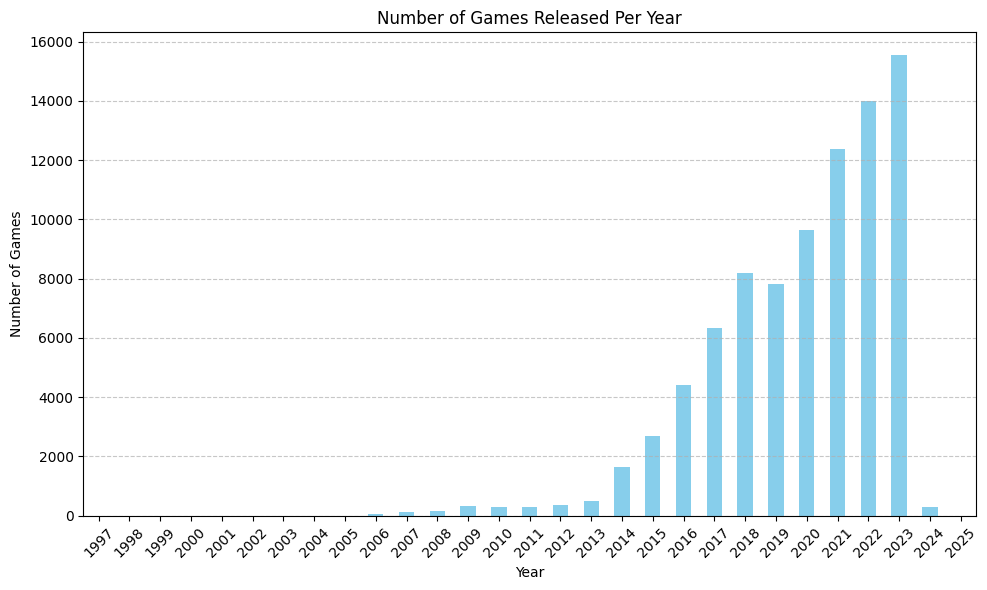

In [14]:
games_df['year'] = games_df['ParsedReleaseDate'].dt.year
year_counts = games_df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We need data that will cover enough time to have games that will have gone on sale, and we still want a good amount. It's possible pandemic could have affect how long the first sale occured, and we don't want to make too many requests whilst still getting data from about 10000 games. Thus, let's use years 2016 and 2017 for now.

In [15]:
games_selected_years_df = games_df[games_df['year'] >= 2016]
games_selected_years_df = games_selected_years_df[games_selected_years_df['year'] < 2018]
games_selected_years_df = games_selected_years_df.reset_index(drop=True)
games_selected_years_df.shape

(10750, 42)

In [17]:
#saving this for ease of access later
games_selected_years_df.to_csv('../data/games_2016_2017.csv')

We should also filter out games that don't support English.

In [114]:
import numpy as np
import ast

In [121]:
def remove_non_english_games(supported_languages_lst):
    #supported_languages_lst = ast.literal_eval(supported_languages_lst)
    if 'English' not in supported_languages_lst:
        return np.nan
    else:
        return supported_languages_lst
    
games_selected_years_df['Supported languages'] = games_selected_years_df['Supported languages'].apply(remove_non_english_games)

games_selected_years_df = games_selected_years_df.dropna(subset=['Supported languages'])
games_selected_years_df.shape

(10613, 42)

The documentation doesn't specify a rate limit, so we can try to find it.

In [12]:
# testing to see if requests has the rate limit
endpoint_prices = 'https://api.isthereanydeal.com/games/history/v2'

since_datetime = datetime.strptime('2015-06-23 00:0:00', '%Y-%m-%d %H:%M:%S') # random release date
since_datetime_str = since_datetime.isoformat() + '-05:00'

params = {
    'key': api_key,
    'country': 'US',
    'id': "018d937f-0e0c-70be-91d5-75e399e6b4e3",
    'shops': [61],
    'since': since_datetime_str
}

response = requests.get(endpoint, params=params)
if response.status_code == 200:
    # Print the response headers
    print("Response Headers:")
    for header, value in response.headers.items():
        print(f"{header}: {value}")
    
    rate_limit = response.headers.get('X-RateLimit-Limit')
    rate_remaining = response.headers.get('X-RateLimit-Remaining')
    rate_reset = response.headers.get('X-RateLimit-Reset')

    print("\nRate Limit Info:")
    if rate_limit:
        print(f"X-RateLimit-Limit: {rate_limit}")
    if rate_remaining:
        print(f"X-RateLimit-Remaining: {rate_remaining}")
    if rate_reset:
        print(f"X-RateLimit-Reset: {rate_reset}")

Response Headers:
Date: Sun, 19 May 2024 12:59:59 GMT
Content-Type: application/json
Transfer-Encoding: chunked
Connection: keep-alive
set-cookie: PHPSESSID=o2ihjn7q3tpm2i7f8nab2pgufa; path=/
expires: Thu, 19 Nov 1981 08:52:00 GMT
Cache-Control: no-store, no-cache, must-revalidate
pragma: no-cache
x-frame-options: DENY
access-control-allow-origin: *
CF-Cache-Status: DYNAMIC
Report-To: {"endpoints":[{"url":"https:\/\/a.nel.cloudflare.com\/report\/v4?s=PaxE%2BRGPjB0kYJ5%2FS9MzzRFoaTM%2FOAfDvI%2F6Kk2zOYHZSBUM7F%2FY6lHnj6M8sD%2B4ZiAt32Ds%2FKvobIkjzB9DU5krz%2Bys02ycsDQ12MWpw49fXc9H1iV4ouesqWJVHbzXTocPHTHvehQ%3D"}],"group":"cf-nel","max_age":604800}
NEL: {"success_fraction":0,"report_to":"cf-nel","max_age":604800}
Server: cloudflare
CF-RAY: 8864446e6f16726b-EWR
Content-Encoding: br
alt-svc: h3=":443"; ma=86400

Rate Limit Info:


No rate limit, will have to guess then.

We don't need to request the release date since we have that here from the Kaggle dataset, but note if we add future data then we will need to.

In [11]:
def get_game_id(appid, api_key, endpoint = 'https://api.isthereanydeal.com/games/lookup/v1'):
    params = {
        'key': api_key,
        'appid': appid
    }

    game_lookup = request_game_data(endpoint, params)
    
    return game_lookup['game']['id']

#with the kaggle data, we already have release dates, so this is unnecessary for now
def get_game_info(game_id, api_key, endpoint = 'https://api.isthereanydeal.com/games/info/v2'):
    params = {
        'key': api_key,
        'id': game_id
    }

    game_info = request_game_data(endpoint, params)
    
    return game_info['releaseDate']

def get_price_history(game_id, release_date, endpoint='https://api.isthereanydeal.com/games/history/v2'):
    since_datetime = datetime.strptime(f"{release_date} 00:0:00", "%Y-%m-%d %H:%M:%S")
    since_datetime_str = since_datetime.isoformat() + '-05:00'


    params = {
        'key': api_key,
        'country': 'US',
        'id': game_id,
        'shops': [61], # 61 is Steam
        'since': since_datetime_str
    }

    price_history = request_game_data(endpoint, params)

    return price_history

Iterating through games_df to get pricing history data.

In [ ]:
# If we want to limit requests, but in an old post they said there is not limit:
import time

# don't know what rate limit is so adding a typical one here of 60 requests per minute
max_requests_per_minute = 60

# each function call makes a request
requests_per_iteration = 2

# Calculate the required wait time between iterations
wait_time_per_iteration = 60 / (max_requests_per_minute / requests_per_iteration)

In [138]:
game_id_lst = []
price_history_lst = []

for i, row in games_selected_years_df.iterrows():
    try:
        game_id = get_game_id(row['AppID'], api_key)
        games_price_history = get_price_history(game_id, row['ReleaseDate'])

        game_id_lst.append(game_id)
        price_history_lst.append(games_price_history)
    except Exception as e:
        print(f"An error occurred for row {i}: {e}")
        continue

    
    # time.sleep(wait_time_per_iteration) # uncomment if want to limit requests
    

An error occurred for row 1840: string indices must be integers
An error occurred for row 4995: string indices must be integers
An error occurred for row 4996: string indices must be integers
An error occurred for row 4997: string indices must be integers
An error occurred for row 4999: string indices must be integers
An error occurred for row 5000: string indices must be integers
An error occurred for row 5003: string indices must be integers
An error occurred for row 5004: string indices must be integers
An error occurred for row 5007: string indices must be integers
An error occurred for row 5012: string indices must be integers
An error occurred for row 10305: 'game'


In [139]:
game_id_series = pd.Series(game_id_lst)
price_history_series = pd.Series(price_history_lst)

api_data = pd.concat([game_id_series, price_history_series], axis = 1)
api_data = api_data.rename(columns={0:'game_ids', 1:'price_history'})

In [141]:
api_data.to_csv('../data/price_history.csv')

### Merging Datasets

Now let's put these dataframes together. We need to remove the indices that had errors first though.

In [50]:
games_selected_years_df = pd.read_csv('../data/games_2016_2017.csv')
games_selected_years_df = games_selected_years_df.drop(columns='Unnamed: 0')
games_selected_years_df.shape

(10750, 42)

In [29]:
api_data = pd.read_csv('../data/price_history.csv')
api_data = api_data.drop(columns='Unnamed: 0')
api_data = api_data.drop_duplicates(subset='game_ids')
api_data.shape

(10601, 2)

So 148 rows are missing, but we don't know which ones. Unfortunately we will have to iterate again, but we can use the api_data and just look up the games and get the app_id. 

In [43]:
from tqdm import tqdm

# we'll just get the full info just in case
def get_game_info(game_id, api_key, endpoint = 'https://api.isthereanydeal.com/games/info/v2'):
    params = {
        'key': api_key,
        'id': game_id
    }

    game_info = request_game_data(endpoint, params)
    
    return game_info

game_info_lst = []

game_ids = list(api_data['game_ids'])

for i, game_id in enumerate(tqdm(game_ids, desc="Processing game IDs")):
    try:
        game_info = get_game_info(game_id, api_key)
        game_info_lst.append(game_info)
    except Exception as e:
        print(f"An error occurred at index {i}: {e}")
        continue

game_info_df = pd.DataFrame(game_info_lst)
game_info_df.to_csv('../data/game_info.csv', index=False)

Processing game IDs: 100%|██████████| 10602/10602 [2:50:25<00:00,  1.04it/s] 


In [40]:
game_info_df = pd.read_csv('../data/game_info.csv')

There are some null values and duplicates to get rid of.

In [41]:
game_info_df['appid'].isna().sum()

239

In [42]:
game_info_df2 = game_info_df.dropna(subset='appid')
game_info_df2 = game_info_df2.rename(columns={'id': 'game_ids'})

# because we didn't remove duplicates in api_data before, we ended up with the same duplicate here
game_info_df2 = game_info_df2.drop_duplicates(subset='game_ids')
game_info_df2.shape


(10362, 18)

In [44]:
complete_api_data = game_info_df2.merge(api_data, how='left', on='game_ids')
complete_api_data.shape

(10362, 19)

Now we can combine all three datasets to get what we need to make predictions.

In [57]:
complete_api_data = complete_api_data.rename(columns={'appid': 'AppID'})

In [59]:
complete_api_data = complete_api_data.rename(columns={'appid': 'AppID'})
complete_api_data = complete_api_data.merge(games_selected_years_df, how='left', on='AppID')

In [61]:
complete_api_data.head(3)

,game_ids,slug,title,type,mature,assets,earlyAccess,achievements,tradingCards,AppID,...,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,ReleaseDate,ParsedReleaseDate,year
0,018d937f-0a5b-70dc-b37c-4a0a46d1b122,train-bandit,Train Bandit,game,False,{'boxart': 'https://dbxce1spal1df.cloudfront.n...,False,True,False,655370.0,...,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2017-10-12,2017-10-12,2017.0
1,018d937f-00f3-70e3-b3ff-eeb61ac9966c,cthulhu-realms,Cthulhu Realms,game,False,{'boxart': 'https://dbxce1spal1df.cloudfront.n...,False,False,False,485000.0,...,"Wise Wizard Games, LLC","Wise Wizard Games, LLC","Single-player,Multi-player,Shared/Split Screen...",Strategy,"Card Game,Strategy,Deckbuilding,Lovecraftian,B...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2016-07-01,2016-07-01,2016.0
2,018d937f-158f-72b0-9909-e63af7a0fbbe,steam-squad,Steam Squad,game,False,{'boxart': 'https://dbxce1spal1df.cloudfront.n...,False,True,True,290870.0,...,Bretwalda Games,Bretwalda Games,"Single-player,Multi-player,PvP,Shared/Split Sc...","Indie,Strategy","Strategy,Indie,Turn-Based,World War I,Steampun...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2016-07-28,2016-07-28,2016.0


Now let's take a closer look at all the columns to see which ones might be of interest for modeling.

In [84]:
example_row = dict(complete_api_data.iloc[0, :])

for key, value in example_row.items():
    print(key)
    print(value, '\n')

game_ids
018d937f-0a5b-70dc-b37c-4a0a46d1b122 

slug
train-bandit 

title
Train Bandit 

type
game 

mature
False 

assets
{'boxart': 'https://dbxce1spal1df.cloudfront.net/018d937f-0a5b-70dc-b37c-4a0a46d1b122/boxart.jpg', 'banner145': 'https://dbxce1spal1df.cloudfront.net/018d937f-0a5b-70dc-b37c-4a0a46d1b122/banner145.jpg', 'banner300': 'https://dbxce1spal1df.cloudfront.net/018d937f-0a5b-70dc-b37c-4a0a46d1b122/banner300.jpg', 'banner400': 'https://dbxce1spal1df.cloudfront.net/018d937f-0a5b-70dc-b37c-4a0a46d1b122/banner400.jpg', 'banner600': 'https://dbxce1spal1df.cloudfront.net/018d937f-0a5b-70dc-b37c-4a0a46d1b122/banner600.jpg'} 

earlyAccess
False 

achievements
True 

tradingCards
False 

AppID
655370.0 

tags
['Indie', 'Action', 'Pixel Graphics', '2D', 'Retro'] 

releaseDate
2017-10-12 

developers
[{'id': 7238, 'name': 'Rusty Moyher'}] 

publishers
[{'id': 12181, 'name': 'Wild Rooster'}] 

reviews
[{'score': 86, 'source': 'Steam', 'count': 58, 'url': 'https://store.steampowered.co

Here are the potentially useful columns for modeling. Note, we are selecting columns with info that we would have for a new game. Data like player count or reviews aren't useful for predicting newer games (unless we had that data for a game on initial release, but we don't). 

- mature
- tradingCards
- achievements
- earlyAccess
- tags or Tags (duplicate columns)
- publishers
- price_history
- Release date or ReleaseDate (already in datetime friendly format)
- About the game
- Supported Languages
- Windows
- Mac
- Linux
- Categories
- Genres

We will want the game_id, appid, and title as well just in case.

In [92]:
raw_train_test_data = complete_api_data[['game_ids', 'AppID', 'title', 'mature', 'earlyAccess',
       'achievements', 'tradingCards', 'price_history', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Publishers', 'Categories', 'Genres', 'Tags',
       'ReleaseDate']]

raw_train_test_data.head(3)

,game_ids,AppID,title,mature,earlyAccess,achievements,tradingCards,price_history,About the game,Supported languages,...,Support url,Support email,Windows,Mac,Linux,Publishers,Categories,Genres,Tags,ReleaseDate
0,018d937f-0a5b-70dc-b37c-4a0a46d1b122,655370.0,Train Bandit,False,False,True,False,"[{'timestamp': '2024-05-13T19:16:33+02:00', 's...",THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,NaN,support@rustymoyher.com,True,True,False,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017-10-12
1,018d937f-00f3-70e3-b3ff-eeb61ac9966c,485000.0,Cthulhu Realms,False,False,False,False,"[{'timestamp': '2024-02-11T03:20:08+01:00', 's...",Star Realms has gone insane! Introducing Cthul...,['English'],...,https://www.wisewizardgames.com/contact-us/,support@wisewizardgames.com,True,True,False,"Wise Wizard Games, LLC","Single-player,Multi-player,Shared/Split Screen...",Strategy,"Card Game,Strategy,Deckbuilding,Lovecraftian,B...",2016-07-01
2,018d937f-158f-72b0-9909-e63af7a0fbbe,290870.0,Steam Squad,False,False,True,True,"[{'timestamp': '2024-02-11T02:17:53+01:00', 's...","Steam Squad - tactical wargame, where gameplay...","['English', 'Russian', 'French', 'German']",...,http://steamsquad.net/,steamsquad@bretwalda.net,True,True,True,Bretwalda Games,"Single-player,Multi-player,PvP,Shared/Split Sc...","Indie,Strategy","Strategy,Indie,Turn-Based,World War I,Steampun...",2016-07-28


## EDA and Preprocessing

### Target Variable

The target variable will be the amount of time from the release date to the first price drop.

In [98]:
import ast

example_ph = ast.literal_eval(raw_train_test_data['price_history'][0])

In [101]:
example_ph[0]

{'timestamp': '2024-05-13T19:16:33+02:00',
 'shop': {'id': 61, 'name': 'Steam'},
 'deal': {'price': {'amount': 0.49, 'amountInt': 49, 'currency': 'USD'},
  'regular': {'amount': 0.99, 'amountInt': 99, 'currency': 'USD'},
  'cut': 51}}

In [120]:
example_idx = 2
regular_price = example_ph[example_idx]['deal']['regular']['amount']
regular_price

0.99

In [121]:
discount_price = example_ph[example_idx]['deal']['price']['amount']
discount_price

0.49

In [128]:
for i in range(len(example_ph)-1, -1, -1):
    regular_price = example_ph[i]['deal']['regular']['amount']
    discount_price = example_ph[i]['deal']['price']['amount']

    if discount_price < regular_price:
        print(example_ph[i]['timestamp'])
        print(i)
        break

2017-11-13T19:45:35+01:00
100


In [131]:
example_ph[-1]['timestamp']

'2017-10-13T13:15:45+02:00'